In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import PIL
import requests

np.random.seed(613)

In [7]:
!pip install plotly seaborn nbformat wordcloud matplotlib-venn

In [8]:
from wordcloud import WordCloud

In [9]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


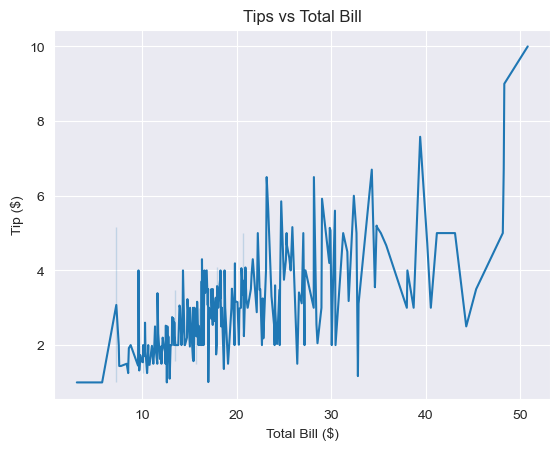

In [20]:
# Setting the style of the plot
sns.set_style('darkgrid')

# Creating the line plot
tipgraph =sns.lineplot(data=tips,    #choose the dataset to plot
             x ="total_bill",   #choose the x-axis variable
             y ="tip"    #choose the y-axis variable
            )

#Add title and labels
tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip ($)'
            )

plt.show()  #display the plot only, not the working going behind the output




[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip ($)')]

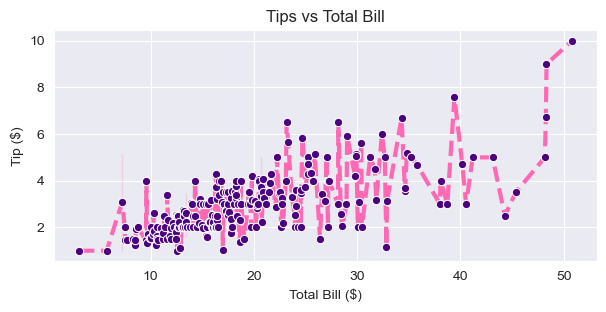

In [23]:
#Modify aesthetics
fig = plt.subplots(figsize=(7, 3))  #set figure size

tipgraph = sns.lineplot(data = tips,
                        x='total_bill',
                        y='tip',
                        color='hotpink',
                        linestyle='--',
                        linewidth=3,
                        marker='o',
                        markerfacecolor='indigo')

tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip ($)'
            )

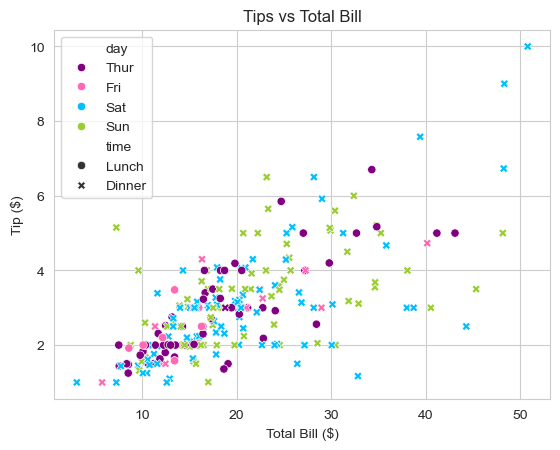

In [18]:
#Add multiple variables
tipgraph = sns.scatterplot(data = tips,
                        x='total_bill',
                        y='tip',
                        style = 'time',
                        hue = 'day',
                        palette=['purple','hotpink','deepskyblue','yellowgreen'])

tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
            ylabel = 'Tip ($)')

plt.show()

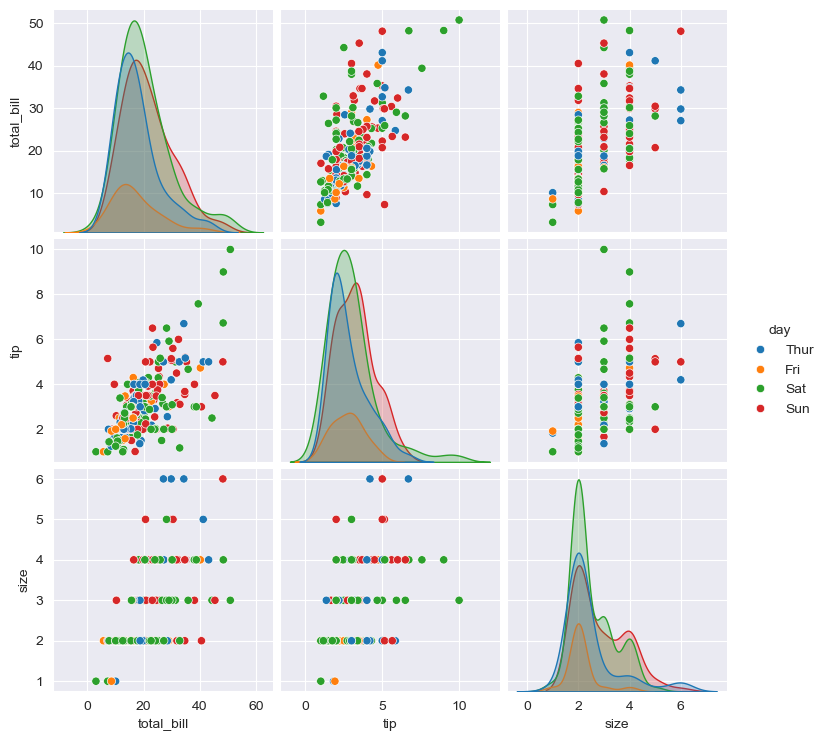

In [ ]:
#Pairplot - helps visualize relationships between multiple variables
# Create pairplot
sns.pairplot(data = tips,
             hue = 'day')

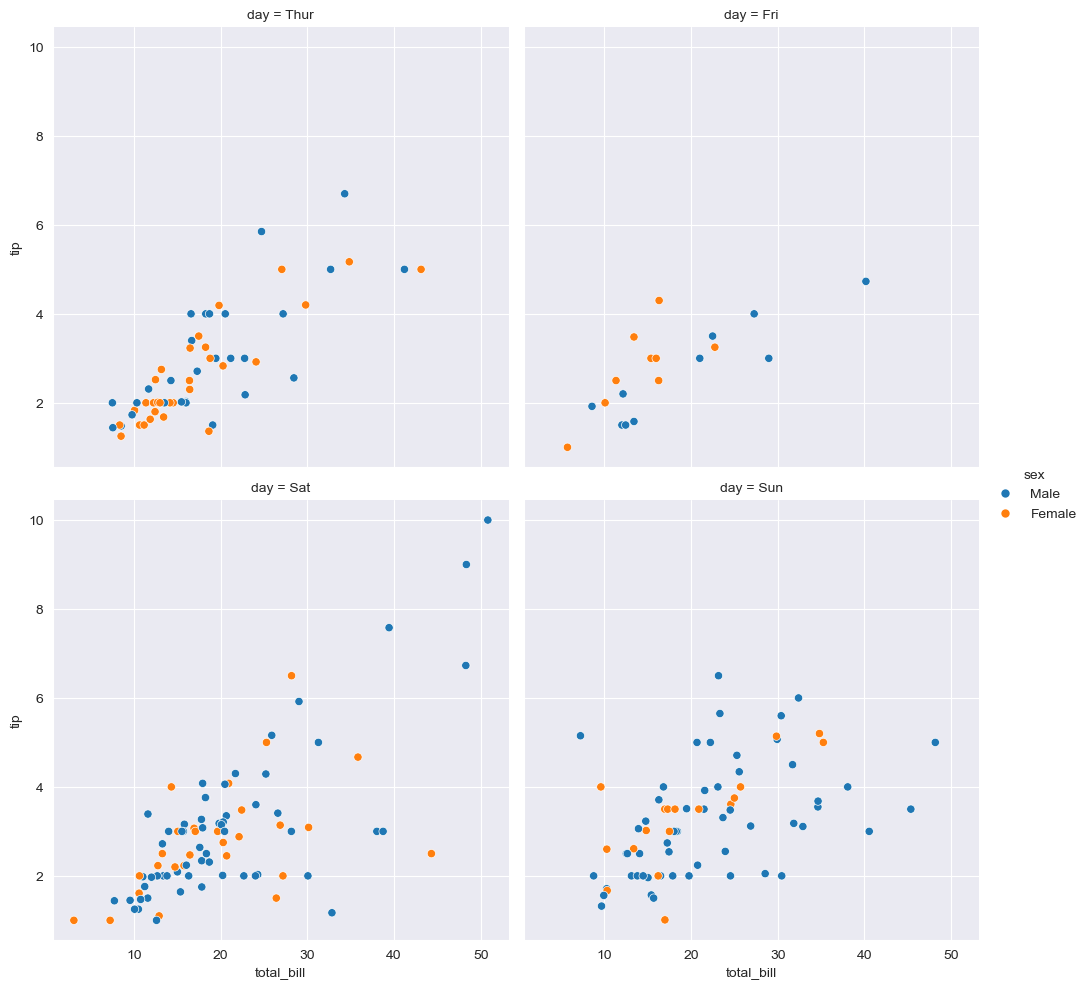

In [ ]:
#Relplot - similar to pairplot but for specific x and y variables
dayplot = sns.relplot(data = tips,
                      x = 'total_bill',
                      y = 'tip',
                      hue = 'sex',   #helps to color by different categories
                      col = 'day',   #helps to create multiple plots based on different days
                      kind = 'scatter',   #helps to choose type of plot
                      col_wrap=2     #number of plots per row
                    )

dayplot

## Activity: Comparing data visualizations

### How they are similar/different? What does each viz do?
### what are the pros and cons of each visualization?

```
Bar graph-quantitative, static, relationship can be inferred,simple, shows aggregated resukts

Gendered Language-has both qual and quant data, interactive, no relationship can be inferred, a lot of info at granular level
```



## Activity: Types of Changes

```
The graph sort the labels of the axes depending on the result the search brings.

Constant: data split into male and female, also the list of subjects
Changing: the order of the subjects in the axis and correspondent amounts

immediate - since scale is being altered, variables are moving around. can't directly compare one snapshot to another

changes I will make: 
```

In [30]:
import plotly.graph_objects as go
import nbformat


x1 = np.array(['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji'])
y1 = np.array([110,180,240,99,220])

#making our plot
#make our figure
graph = go.Figure()

#choose our plot type (bar) and our data
graph.add_trace(go.Bar(x=x1, y=y1))

#update our layout to include titles
graph.update_layout(
 title="Pirate Scores",
 xaxis_title="Pirates",
 yaxis_title="Score")

graph.show()

In [34]:
graph = go.Figure()

graph.add_trace(go.Scatter(x=x1,
                           y=y1, 
                           mode = 'markers',
                           marker = dict(size = 15,
                           color = 'hotpink',
                           opacity = 1,
                           line = dict(width=5, color = 'purple')
                       )))

graph.update_layout(
    title = 'Interactive Pirate Plot',
    xaxis_title = 'Pirates',
    yaxis_title = 'Scores',
    width = 500,
    height = 500)

In [37]:
from wordcloud import WordCloud

df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines='skip')

df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

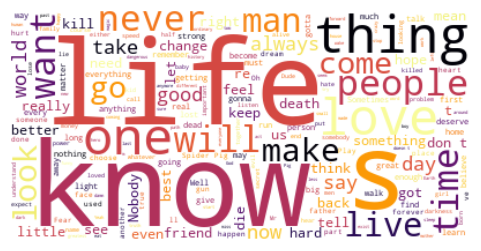

In [38]:
text = " ".join(each for each in df.quote)

wordcloud = WordCloud(background_color="white",
                      colormap="inferno",
                      random_state=613).generate(text)

fig, ax = plt.subplots(figsize=(7,3))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

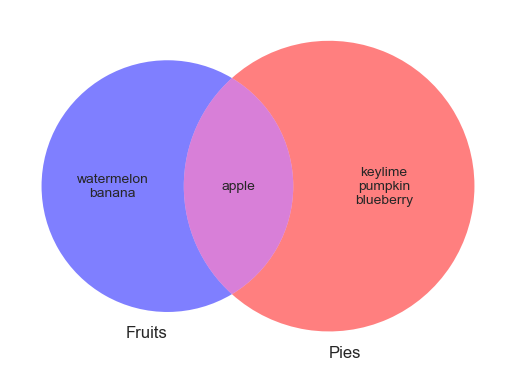

In [45]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(['apple', 'banana', 'watermelon'])
B = set(['pumpkin', 'blueberry', 'apple', 'keylime'])

diagram = venn2([A, B],
                set_labels = ('Fruits', 'Pies'),
                set_colors = ('blue', 'red'),
                alpha = 0.5)

diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))